Primera red neuronal.

In [1]:
print ('Hola mundo')

Hola mundo


In [2]:
import numpy as np
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
diabetes_train = pd.read_csv('/content/diabetes_train - diabetes_train.csv')
diabetes_train

In [ ]:
X = diabetes_train.iloc[ : , 0 : 8].values
X

In [ ]:
y = diabetes_train.iloc[ : , 8].values
y

## Definir la estructura de la red neuronal.

In [45]:
model = Sequential()

In [46]:
model.add(Dense(12, input_dim = 8, activation = 'relu'))

In [47]:
model.add(Dense(8, activation = 'relu'))

In [48]:
model.add(Dense(1, activation = 'sigmoid'))

## Modelo de compilación de una red neuronal.

In [49]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Entrenamiento de una red neuronal.

In [59]:
historial = model.fit(X, y, epochs = 1000, batch_size = 10)

Epoch 1/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.5431 - accuracy: 0.7143
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5153 - accuracy: 0.8095
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5030 - accuracy: 0.8095
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7619
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7619
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.7619
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.7619
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7619
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8095
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.8095
Epoch 11/1000
3/3 [

## Visualizar función de perdida.

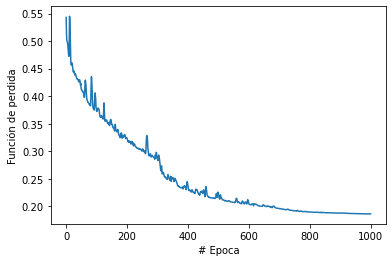

In [60]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Función de perdida")

plt.plot(historial.history['loss'])

In [ ]:
diabetes_test = pd.read_csv('/content/diabetes_test - diabetes_test.csv')
diabetes_test

In [ ]:
X_test = diabetes_test.iloc[ : , 0 : 8].values
X

In [ ]:
y_test = diabetes_test.iloc[ : , 8].values
y

In [64]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 207ms/step - loss: 0.1860 - accuracy: 0.9048


[0.18601295351982117, 0.9047619104385376]

In [65]:
y_pred = model.predict(X_test)
np.round(y_pred)

1/1 [==============================] - 0s 83ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
resultados = pd.DataFrame(np.round(y_pred), columns=['Predicción'])
resultados['Real'] = pd.Series(y_test)
resultados

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
matrix = confusion_matrix(resultados['Real'], resultados ['Predicción'])

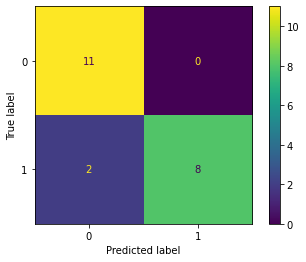

In [71]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot()